In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import explained_variance_score
import matplotlib
from matplotlib import pyplot as plt

In [10]:
df = pd.read_csv("count and temperature 1997-2019.csv")
mu, sigma = 0, 0.1
noise = np.random.normal(mu, sigma, [df.shape[0],]) 
df["noised_total"]=df["total"]+noise

In [11]:
df

,date,total,tmin,tmax,year,month,day,avg,season,noised_total
0,1997-01-01,0,28,33,1997,1,1,30.5,Winter,-0.053366
1,1997-01-02,1,32,42,1997,1,2,37.0,Winter,0.982164
2,1997-01-03,0,31,38,1997,1,3,34.5,Winter,0.029598
3,1997-01-04,0,35,39,1997,1,4,37.0,Winter,-0.041213
4,1997-01-05,0,9,35,1997,1,5,22.0,Winter,0.091260
...,...,...,...,...,...,...,...,...,...,...
8395,2019-12-27,0,22,38,2019,12,27,30.0,Winter,-0.154652
8396,2019-12-28,0,21,42,2019,12,28,31.5,Winter,0.103018
8397,2019-12-29,0,42,54,2019,12,29,48.0,Winter,-0.118080
8398,2019-12-30,0,24,42,2019,12,30,33.0,Winter,0.092791


In [23]:
li = [12]+list(range(1,12))

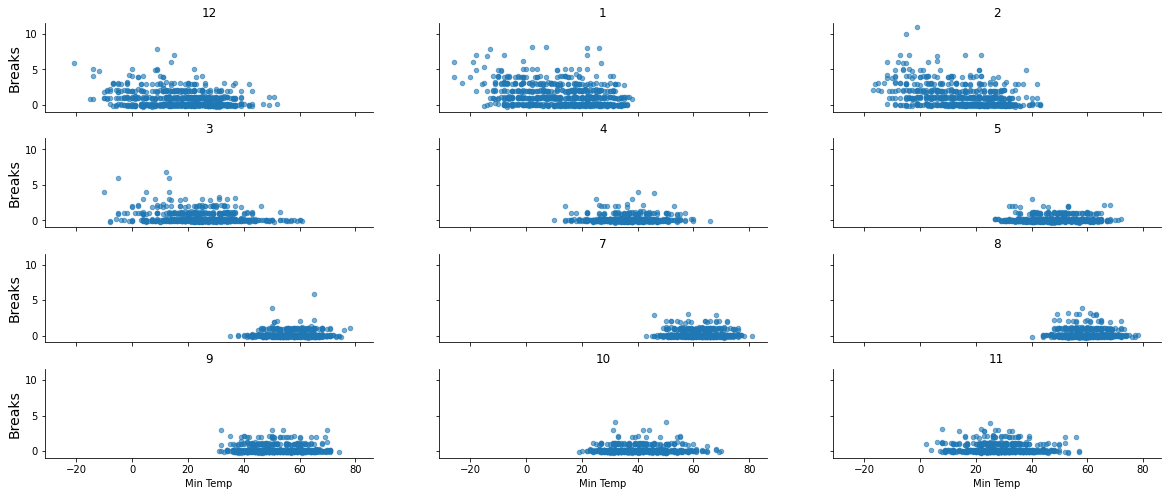

In [24]:
fig,axes = plt.subplots(4,3,figsize = (20,8),sharex = True,sharey=True)
plt.subplots_adjust(hspace = 0.3)
axes = list(axes.reshape(-1))
for m in li:
    ax = axes.pop(0)
    ax.set_title(m)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    month_df = df[df["month"]==m]
    month_df.plot.scatter(x = "tmin", y = "noised_total",ax=ax,alpha = 0.6)
    ax.set_xlabel("Min Temp")
    ax.set_ylabel("Breaks",fontsize = 14)
#plt.savefig("break pattern by season")

In [25]:
class OneHot(TransformerMixin):
    def __init__(self,col):
        self.col = col
        self.oh = OneHotEncoder()
    
    def fit(self,x,y=None):
        self.oh.fit(x[[self.col]])
        return self
    
    def transform(self,x):
        ones = self.oh.transform(x[[self.col]])
        ones = pd.DataFrame(ones.toarray(),columns = self.oh.get_feature_names(),index = x.index)
        return pd.concat((x.drop(columns = [self.col]),ones),axis = 1)

In [26]:
train,test = train_test_split(df,stratify = df["month"],train_size = 0.5)

In [31]:
train

,date,total,tmin,tmax,year,month,day,avg,season,noised_total
5195,2011-03-24,0,18,33,2011,3,24,25.5,Spring,-0.109278
2177,2002-12-18,0,35,53,2002,12,18,44.0,Winter,-0.119113
7535,2017-08-19,1,57,81,2017,8,19,69.0,Summer,0.969840
3160,2005-08-27,0,64,84,2005,8,27,74.0,Summer,-0.020742
5010,2010-09-20,2,54,73,2010,9,20,63.5,Fall,2.032069
...,...,...,...,...,...,...,...,...,...,...
3607,2006-11-17,0,29,38,2006,11,17,33.5,Fall,-0.149149
5049,2010-10-29,0,27,50,2010,10,29,38.5,Fall,-0.071252
6227,2014-01-19,3,9,34,2014,1,19,21.5,Winter,2.988657
8096,2019-03-03,0,-6,17,2019,3,3,5.5,Spring,0.139968


In [43]:
p = Pipeline([
    ("onehot",OneHot("month")),
    ("poly",PolynomialFeatures(2)),
    ("lr",LinearRegression())
])
p.fit(train[["tmin","month"]],train["total"])
(explained_variance_score(train["total"],p.predict(train[["tmin","month"]])),
explained_variance_score(test["total"],p.predict(test[["tmin","month"]])))

(0.2528493779798998, 0.25689777985046347)

In [44]:
p["lr"].coef_,p["lr"].intercept_

(array([-1.75170554e-11, -4.30255313e-02,  2.05141544e-01,  1.92842145e-01,
        -1.95227400e-01, -3.78317419e-01, -1.90174698e-01,  1.21855249e-01,
         3.90439246e-01,  3.22905359e-01,  1.55626906e-01, -3.10745590e-01,
        -2.75510919e-01, -3.88344229e-02,  4.83546286e-04, -1.53524898e-03,
        -1.21773865e-02,  3.07062770e-03,  1.04973266e-02,  7.51657003e-04,
        -1.15165129e-02, -1.95321032e-02, -1.71493547e-02, -1.16112771e-02,
         6.24064157e-03,  6.60491419e-03,  3.33118491e-03,  2.05141544e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.92842145e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.95227400e-01,  0.00000000e+00,
         0.0

In [46]:
matplotlib.rcParams.update({"font.size":16})

In [56]:
month_season = [[12,1,2],[3,4,5],[6,7,8],[9,10,11]]

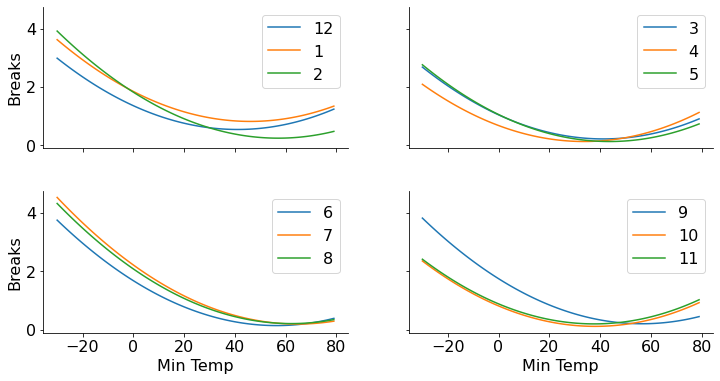

In [57]:
#colors = ["green","steelblue","purple","red"]
def plot_month(month,ax):
    df = pd.DataFrame({
        "month":month,
        "tmin": np.arange(-30,80,1),
    })
    df["predicted_breaks"] = p.predict(df)
    ax = df.plot.line(x="tmin",y="predicted_breaks",label = month, ax=ax)
    return ax

fig,axes = plt.subplots(2,2,figsize = (12,6),sharex = True,sharey=True)
plt.subplots_adjust(hspace = 0.3)
axes = list(axes.reshape(-1))
for season in month_season:
    ax = axes.pop(0)
    for month in season:
        ax = plot_month(month,ax)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlabel("Min Temp")
    ax.set_ylabel("Breaks")
#plt.savefig("break prediction given temperature and season")

In [17]:
df = pd.read_csv("data/water_main_breaks.csv")
df

,X,Y,OBJECTID,Cell_rotation,mslink,break_num,pipe_mslink,pipe_type,break_date,house_num,...,created_user,created_date,last_edited_user,last_edited_date,BreakType,BreakTypeOther,StreetSegmentID,CWWOID,CWWOClosedDate,TotalHoursWaterOff
0,-89.402108,43.067694,1,359.603239,1.0,225.0,18715.0,MAIN,2007/11/01 00:00:00+00,918.0,...,NaN,1970/01/01 00:00:00+00,NaN,1970/01/01 00:00:00+00,NaN,NaN,4996.0,NaN,1970/01/01 00:00:00+00,NaN
1,-89.353687,43.109985,3,359.602939,27.0,226.0,15257.0,MAIN,2007/11/02 00:00:00+00,2255.0,...,NaN,1970/01/01 00:00:00+00,WUPTB,2018/02/15 14:38:16+00,NaN,NaN,2031.0,NaN,1970/01/01 00:00:00+00,NaN
2,-89.323967,43.088787,4,359.602863,28.0,227.0,12532.0,MAIN,2007/11/05 00:00:00+00,3701.0,...,NaN,1970/01/01 00:00:00+00,WUPTB,2018/02/15 14:38:16+00,NaN,NaN,2610.0,NaN,1970/01/01 00:00:00+00,NaN
3,-89.295381,43.090665,5,44.602085,30.0,228.0,11178.0,MAIN,2007/11/07 00:00:00+00,533.0,...,NaN,1970/01/01 00:00:00+00,WUPTB,2018/02/15 14:38:16+00,NaN,NaN,3299.0,NaN,1970/01/01 00:00:00+00,NaN
4,-89.318239,43.089422,7,359.602838,32.0,230.0,12647.0,MAIN,2007/11/09 00:00:00+00,3906.0,...,NaN,1970/01/01 00:00:00+00,WUPTB,2018/02/15 14:38:16+00,NaN,NaN,3055.0,NaN,1970/01/01 00:00:00+00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6988,-89.471668,43.029019,59449,NaN,NaN,71678.0,NaN,SERVICE (WU),1970/01/01 00:00:00+00,NaN,...,WUJAG,2020/09/22 19:59:05+00,WUJAG,2020/09/22 19:59:28+00,NaN,NaN,NaN,NaN,1970/01/01 00:00:00+00,NaN
6989,-89.443707,43.040182,59450,NaN,NaN,71670.0,NaN,MAIN,1970/01/01 00:00:00+00,NaN,...,WUJAG,2020/09/22 20:04:31+00,WUJAG,2020/09/22 20:04:52+00,NaN,NaN,NaN,NaN,1970/01/01 00:00:00+00,NaN
6990,-89.392181,43.052261,59451,NaN,NaN,71715.0,NaN,MAIN,1970/01/01 00:00:00+00,NaN,...,WUJAG,2020/09/22 20:08:26+00,WUJAG,2020/09/22 20:08:45+00,NaN,NaN,NaN,NaN,1970/01/01 00:00:00+00,NaN
6991,-89.397532,43.053033,59452,NaN,NaN,71789.0,NaN,MAIN,1970/01/01 00:00:00+00,NaN,...,WUJAG,2020/09/22 20:11:02+00,WUJAG,2020/09/22 20:11:10+00,NaN,NaN,NaN,NaN,1970/01/01 00:00:00+00,NaN


In [19]:
month_dict = {"Jan":0,"Feb":0,"Mar":0,"Apr":0,"May":0,"Jun":0,"Jul":0,"Aug":0,"Sep":0,"Oct":0,"Nov":0,"Dec":0}
for i in range(len(df)):
    if df.loc[i,"break_month"]== 1:
        month_dict["Jan"]+=1
    elif df.loc[i,"break_month"]== 2:
        month_dict["Feb"]+=1
    elif df.loc[i,"break_month"]== 3:
        month_dict["Mar"]+=1
    elif df.loc[i,"break_month"]== 4:
        month_dict["Apr"]+=1
    elif df.loc[i,"break_month"]== 5:
        month_dict["May"]+=1
    elif df.loc[i,"break_month"]== 6:
        month_dict["Jun"]+=1
    elif df.loc[i,"break_month"]== 7:
        month_dict["Jul"]+=1
    elif df.loc[i,"break_month"]== 8:
        month_dict["Aug"]+=1
    elif df.loc[i,"break_month"]== 9:
        month_dict["Sep"]+=1
    elif df.loc[i,"break_month"]== 10:
        month_dict["Oct"]+=1
    elif df.loc[i,"break_month"]== 11:
        month_dict["Nov"]+=1
    elif df.loc[i,"break_month"]== 12:
        month_dict["Dec"]+=1

In [20]:
new_df = pd.DataFrame.from_dict(month_dict,orient = "index",columns = ["number of breaks"])
new_df

,number of breaks
Jan,518
Feb,293
Mar,109
Apr,35
May,40
Jun,39
Jul,63
Aug,73
Sep,84
Oct,69


In [ ]:
matplotlib.rcParams.update({"font.size":16})

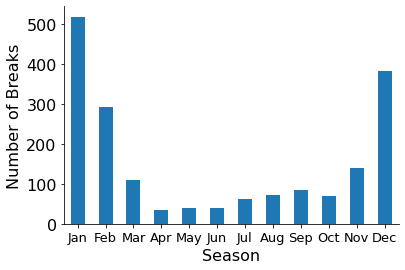

In [38]:
fig,ax = plt.subplots(figsize = (6,4))
new_df.plot.bar(ax=ax,legend=False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xticks(rotation = 0)
ax.set_xlabel("Season")
ax.set_ylabel("Number of Breaks")
plt.xticks(fontsize = 13)
plt.savefig("breaks by month.pdf")